In [3]:
#Import
import pandas as pd
import numpy as np

#Data
import pickle
import statistics
from collections import Counter
from sklearn.manifold import TSNE

#Chemistry
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Fingerprints import FingerprintMols
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def load_pickle_file(filename):
    """Load a pickle file and return its contents."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Load the data
df = load_pickle_file('cleaned_df.pkl')
df_big = load_pickle_file('converted_df.pkl')

In [5]:
def compute_fingerprints(smiles_list):
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprints.append(np.array(fp))
    return np.array(fingerprints)

In [54]:
# Get list of smiles from subset and big dataset (drop duplicates)
AandB = list(set(df['SMILES_A'].tolist() + df['SMILES_B'].tolist()))
AandB_big = list(set(df_big['SMILES_A'].tolist() + df_big['SMILES_B'].tolist()))

In [16]:
# Remove weird SMILES no data
AandB_big = [smile for smile in AandB_big if '@' not in smile and '\\' not in smile]

In [55]:
fingerprints = compute_fingerprints(AandB)
fingerprints_big = compute_fingerprints(AandB_big)

[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerator
[09:41:54] DEPRECATION WARNING: please use MorganGenerat

In [56]:
fingerprints_big

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
pca = PCA(n_components=3)
kmeans = KMeans(n_clusters=3, random_state=42)

In [58]:
reduced_data = pca.fit_transform(fingerprints)
clusters = kmeans.fit_predict(fingerprints)

reduced_data_big = pca.fit_transform(fingerprints_big)
clusters_big = kmeans.fit_predict(fingerprints_big)

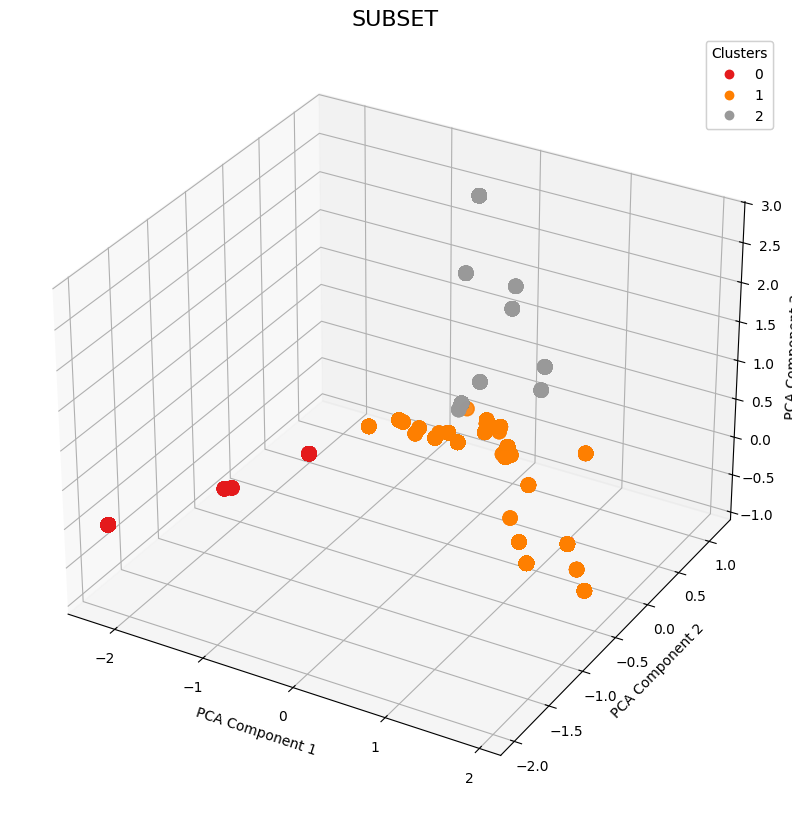

In [24]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='Set1', s=100)

# Add labels and title
ax.set_title('SUBSET', fontsize=16)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [36]:
AandB_name = list(set(df['compA'].tolist() + df['compB'].tolist()))

AandB_name_big = list(set(df_big['compA'].tolist() + df_big['compB'].tolist()))
AandB_name_big = [name for name in AandB_name_big if '1R' not in name and '9Z' not in name]

In [37]:
smiles_with_clusters = pd.DataFrame({
    'SMILES': AandB,
    'Cluster': clusters,
    'Name': AandB_name
})
smiles_with_clusters = smiles_with_clusters.drop_duplicates()
# Display the result
print(smiles_with_clusters)

              SMILES  Cluster                                       Name
0          COCCOCCOC        2                        1,4-dimethylbenzene
1           OCC(O)CO        1                          1,1'-oxybisethane
2           CC(C)CCO        1                      acetic acid anhydride
3            CCCCCCO        1                                 2-propanol
4           CCCCCCCO        1                                     hexane
5               OCCO        1                               acetaldehyde
6           CCC(C)=O        1                         2,3-dimethylbutane
7         OCCOCCOCCO        2                    acetic acid ethyl ester
8                CCO        1                                    ethanol
9                 CO        1                                     decane
10            CCCCCC        1                                   undecane
11        O=C1CCCCC1        1                                  2-butanol
12    CC(C)CC(C)(C)C        1                      

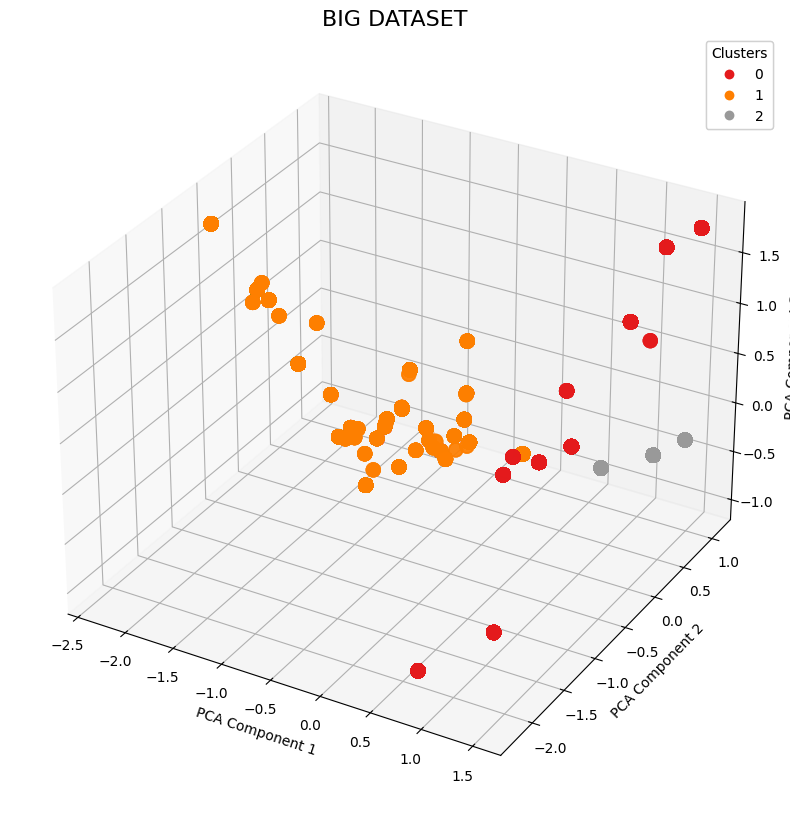

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot
scatter = ax.scatter(reduced_data_big[:, 0], reduced_data_big[:, 1], reduced_data_big[:, 2], c=clusters_big, cmap='Set1', s=100)

# Add labels and title
ax.set_title('BIG DATASET', fontsize=16)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

t-SNE

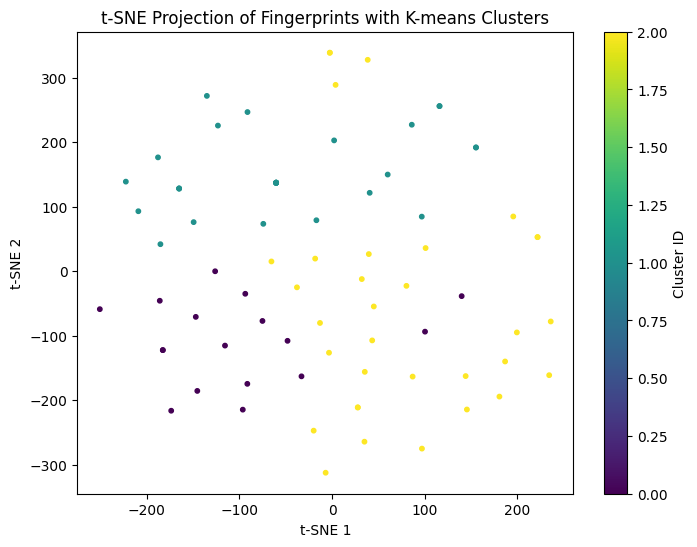

In [46]:
tsne_model = TSNE(n_components=2, random_state=42)
fingerprints_tsne = tsne_model.fit_transform(fingerprints_big)

# Create a scatter plot with coloring based on the K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], c=clusters_big, cmap='viridis', s=10)
plt.title("t-SNE Projection of Fingerprints with K-means Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster ID")  # Add color bar to show cluster labels
plt.show()

In [47]:
tsne_model_sub = TSNE(n_components=3, random_state=42)
fingerprints_tsne_sub = tsne_model_sub.fit_transform(fingerprints)

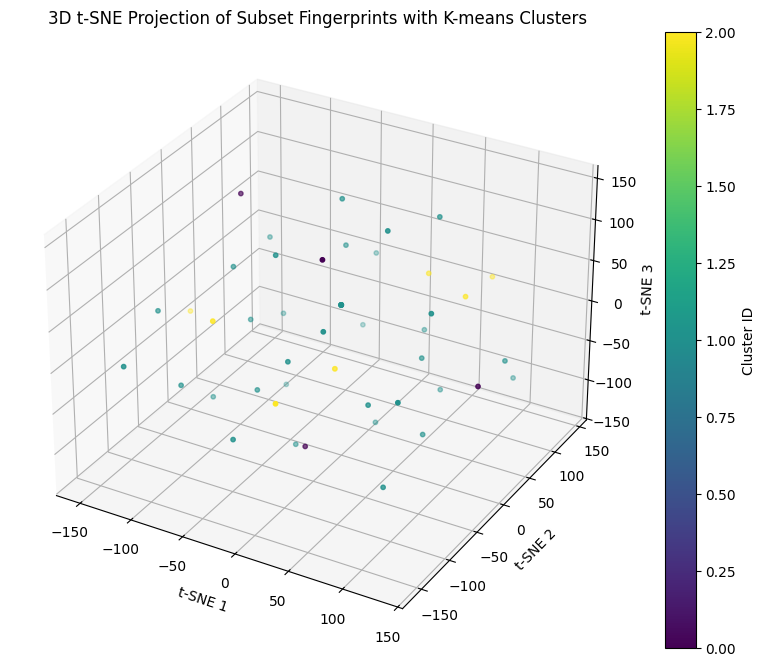

In [48]:
# Create a 3D scatter plot with coloring based on the K-means clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(fingerprints_tsne_sub[:, 0], fingerprints_tsne_sub[:, 1], fingerprints_tsne_sub[:, 2],
                     c=clusters, cmap='viridis', s=10)

# Add labels and color bar
ax.set_title("3D t-SNE Projection of Subset Fingerprints with K-means Clusters")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
fig.colorbar(scatter, label="Cluster ID")  # Add color bar to show cluster labels

plt.show()

In [49]:
tsne_model = TSNE(n_components=3, random_state=42)
fingerprints_tsne = tsne_model.fit_transform(fingerprints_big)

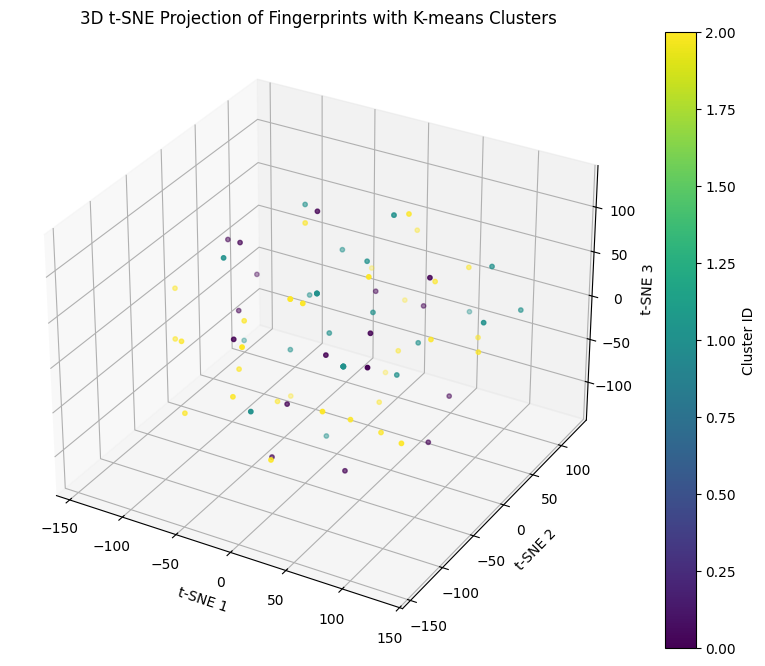

In [50]:
# Create a 3D scatter plot with coloring based on the K-means clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], fingerprints_tsne[:, 2],
                     c=clusters_big, cmap='viridis', s=10)

# Add labels and color bar
ax.set_title("3D t-SNE Projection of Fingerprints with K-means Clusters")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
fig.colorbar(scatter, label="Cluster ID")  # Add color bar to show cluster labels

plt.show()

In [59]:
# Combine whole dataset and subset
combined_data = np.vstack([fingerprints_big, fingerprints])  # Combine whole dataset and subset

# Apply t-SNE to the combined data
tsne_model = TSNE(n_components=3, random_state=42)
combined_tsne = tsne_model.fit_transform(combined_data)

# Get the cluster labels
combined_clusters = np.concatenate([clusters_big, clusters])

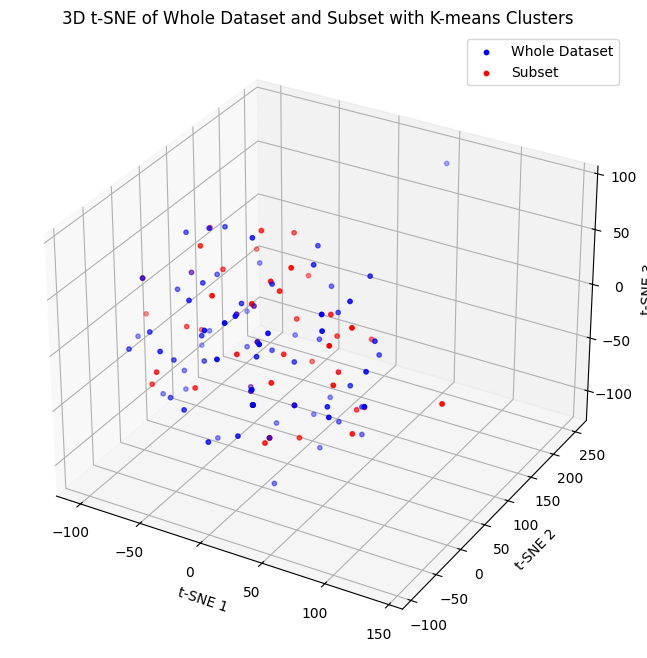

In [61]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# We will use two distinct colors for the whole dataset and the subset
scatter_whole = ax.scatter(combined_tsne[:len(fingerprints_big), 0], combined_tsne[:len(fingerprints_big), 1], combined_tsne[:len(fingerprints_big), 2],
                           c='blue', label='Whole Dataset', s=10)
scatter_subset = ax.scatter(combined_tsne[len(fingerprints_big):, 0], combined_tsne[len(fingerprints_big):, 1], combined_tsne[len(fingerprints_big):, 2],
                            c='red', label='Subset', s=10)

# Add labels and color bar
ax.set_title("3D t-SNE of Whole Dataset and Subset with K-means Clusters")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")

# Add legend to indicate which color corresponds to which dataset
ax.legend()

# Show the plot
plt.show()

GAUL_HDAD